Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija, Kanonička korelacijska analiza

**Rok za predaju: 7. svibnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [277]:
# Učitajte sve potrebne biblioteke
# <Vaš kôd ovdje>

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis, SparsePCA
from factor_analyzer import FactorAnalyzer
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd
from sklearn.cross_decomposition import CCA
import scipy
import linearmodels

### 0. Podatkovni skup

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedeća 22 fonda:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `GLD` (SPDR Gold Trust) - zlato,
- `USO` (United States Oil Fund) - nafta,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLB` (Materials Select Sector SPDR Fund) - dionice tvrtki za materijale,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLI` (Industrial Select Sector SPDR Fund) - dionice tvrtki industrijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `XLP` (Consumer Staples Select Sector SPDR Fund) - dionice tvrki za necikličku potrošačku robu,
- `XLU` (Utilities Select Sector SPDR Fund) - dionice tvrtki komunalnih djelatnosti,
- `XLV` (Health Care Select Sector SPDR Fund) - dionice tvrtki iz zdravstvenog sektora,
- `XLY` (Consumer Discretionary Select Sector SPDR Fund) - dionice tvrtki za cikličku potršačku robu,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: $R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u trenutku (tjednu) $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte tjedne povrate te vizualizirajte matricu korelacije povrata. U ostatku laboratorijske vježbe također koristite povrate, a ne cijene. 

In [64]:
# <Vaš kôd ovdje>

df = pd.read_csv('ETFprices.csv', index_col='Time', parse_dates=True).dropna()

In [65]:
df

,AGG,IEF,LQD,SHY,TIP,TLT,DBC,GLD,USO,IJH,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,IYR,VNQ
Time,,,,,,,,,,,,,,,,,,,,,
2006-04-09,65.098267,56.765045,60.709454,65.214424,68.620300,55.092194,23.188368,59.500000,68.820000,65.633980,...,42.919556,15.426526,25.990246,18.212362,16.622107,18.971766,24.899368,27.910067,40.649319,36.122509
2006-04-16,65.111481,57.075443,60.989243,65.304390,69.292107,55.327076,24.197361,63.200001,72.809998,67.693954,...,45.941833,15.730494,26.780851,18.179399,16.736456,19.605413,25.011742,27.968210,42.063606,37.397419
2006-04-23,65.323631,57.011932,61.000893,65.361687,69.188210,54.909496,23.716009,65.089996,69.620003,67.358994,...,43.942360,16.129461,26.504519,18.006340,17.029449,19.649326,24.875284,28.317101,41.898617,37.176445
2006-04-30,65.173912,56.816486,60.832329,65.355927,69.045479,54.758831,23.790062,67.989998,68.000000,68.388985,...,45.265102,16.224453,27.387236,18.064030,17.193806,20.188869,24.706722,28.749039,42.193249,37.414421
2006-05-07,64.934387,56.540386,60.715195,65.355927,69.115135,54.136620,24.854595,71.120003,69.110001,66.195053,...,43.634747,15.768493,26.811550,17.289381,16.915106,19.611689,24.393671,28.317101,40.826107,36.269825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-16,105.790001,103.220001,112.330002,83.389999,109.169998,120.720001,14.551000,118.720001,9.570000,160.710007,...,56.110001,22.790001,62.250000,59.200001,50.180000,53.810001,82.680000,93.760002,74.690002,74.389999
2018-12-23,106.220001,103.809998,112.510002,83.589996,109.430000,121.050003,14.450000,121.059998,9.530000,164.309998,...,57.049999,23.590000,63.770000,61.400002,50.570000,52.830002,85.250000,97.959999,74.709999,74.370003
2018-12-30,106.690002,104.400002,113.150002,83.620003,110.089996,122.110001,14.850000,121.440002,10.180000,168.220001,...,59.869999,24.260000,65.150002,61.500000,51.259998,52.770000,85.959999,100.830002,74.580002,74.320000


In [66]:
df.describe()

,AGG,IEF,LQD,SHY,TIP,TLT,DBC,GLD,USO,IJH,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,IYR,VNQ
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,...,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,90.160809,86.753134,90.011105,78.569315,96.782489,92.612773,22.677504,114.745112,34.986971,107.044648,...,59.527710,13.782107,40.522011,32.068964,33.054493,32.572006,46.270895,52.107848,53.075047,52.617040
std,12.722361,15.020906,18.319105,4.726394,13.772731,22.388784,6.114753,28.628614,21.454442,43.857097,...,11.919914,6.337973,16.745464,15.895656,13.010220,10.685909,22.001572,26.808882,16.065352,17.606637
min,64.934387,56.540386,54.416130,65.214424,68.620300,54.136620,11.915235,56.990002,8.330000,35.470196,...,30.904867,3.200362,12.552687,11.555803,14.987875,15.884344,18.744144,14.057686,14.880168,13.855969
25%,78.451500,74.560722,69.360455,77.130722,83.689091,71.002556,17.038688,93.729999,14.710000,69.842270,...,50.516869,8.321697,27.415050,19.732909,20.742519,23.726895,27.151374,29.063705,41.810215,39.183319
50%,94.344749,92.169815,94.161118,80.571426,103.622932,96.297783,23.433767,117.839996,34.580002,89.809433,...,61.047920,12.913224,32.441280,26.263233,29.863165,28.916191,35.051228,41.463589,51.470165,49.901257
75%,101.097115,99.997544,105.133491,81.798969,108.711391,113.834701,26.298414,127.500000,39.564999,139.989357,...,67.586357,16.881455,51.808964,40.364603,45.487614,39.965690,67.279423,74.057212,66.787335,69.289780
max,106.690002,108.303917,117.260872,83.620003,112.453423,134.723907,45.113354,183.240005,117.389999,203.473907,...,88.747429,29.614069,79.508774,75.018906,57.005516,56.341461,95.436821,116.762367,81.886368,82.427238


In [67]:
# povrati

for column in df.columns:
    df[column] = (df[column] - df[column].shift(1)) / df[column].shift(1)

df = df.dropna()

In [68]:
df

,AGG,IEF,LQD,SHY,TIP,TLT,DBC,GLD,USO,IJH,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,IYR,VNQ
Time,,,,,,,,,,,,,,,,,,,,,
2006-04-16,0.000203,0.005468,0.004609,0.001380,0.009790,0.004263,0.043513,0.062185,0.057977,0.031386,...,0.070417,0.019704,0.030419,-0.001810,0.006879,0.033399,0.004513,0.002083,0.034792,0.035294
2006-04-23,0.003258,-0.001113,0.000191,0.000877,-0.001499,-0.007547,-0.019893,0.029905,-0.043813,-0.004948,...,-0.043522,0.025363,-0.010318,-0.009520,0.017506,0.002240,-0.005456,0.012475,-0.003922,-0.005909
2006-04-30,-0.002292,-0.003428,-0.002763,-0.000088,-0.002063,-0.002744,0.003122,0.044554,-0.023269,0.015291,...,0.030102,0.005889,0.033304,0.003204,0.009651,0.027459,-0.006776,0.015254,0.007032,0.006401
2006-05-07,-0.003675,-0.004860,-0.001926,0.000000,0.001009,-0.011363,0.044747,0.046036,0.016324,-0.032080,...,-0.036018,-0.028103,-0.021020,-0.042884,-0.016209,-0.028589,-0.012671,-0.015024,-0.032402,-0.030592
2006-05-14,0.006660,0.009518,0.007232,0.001632,0.005337,0.021536,-0.053259,-0.077897,-0.051223,-0.031753,...,-0.047938,-0.018072,-0.025479,-0.018112,-0.002112,-0.005438,-0.003620,-0.012027,-0.014579,-0.014372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-16,0.004173,0.008524,-0.000430,0.002391,0.002789,0.021323,-0.045955,0.014181,-0.115527,-0.070423,...,-0.087859,-0.053956,-0.065852,-0.079186,-0.070841,-0.044931,-0.066375,-0.080158,-0.064715,-0.066039
2018-12-23,0.004065,0.005716,0.001602,0.002398,0.002382,0.002734,-0.006941,0.019710,-0.004180,0.022401,...,0.016753,0.035103,0.024418,0.037162,0.007772,-0.018212,0.031084,0.044795,0.000268,-0.000269
2018-12-30,0.004425,0.005683,0.005688,0.000359,0.006031,0.008757,0.027682,0.003139,0.068206,0.023797,...,0.049430,0.028402,0.021640,0.001629,0.013644,-0.001136,0.008328,0.029298,-0.001740,-0.000672


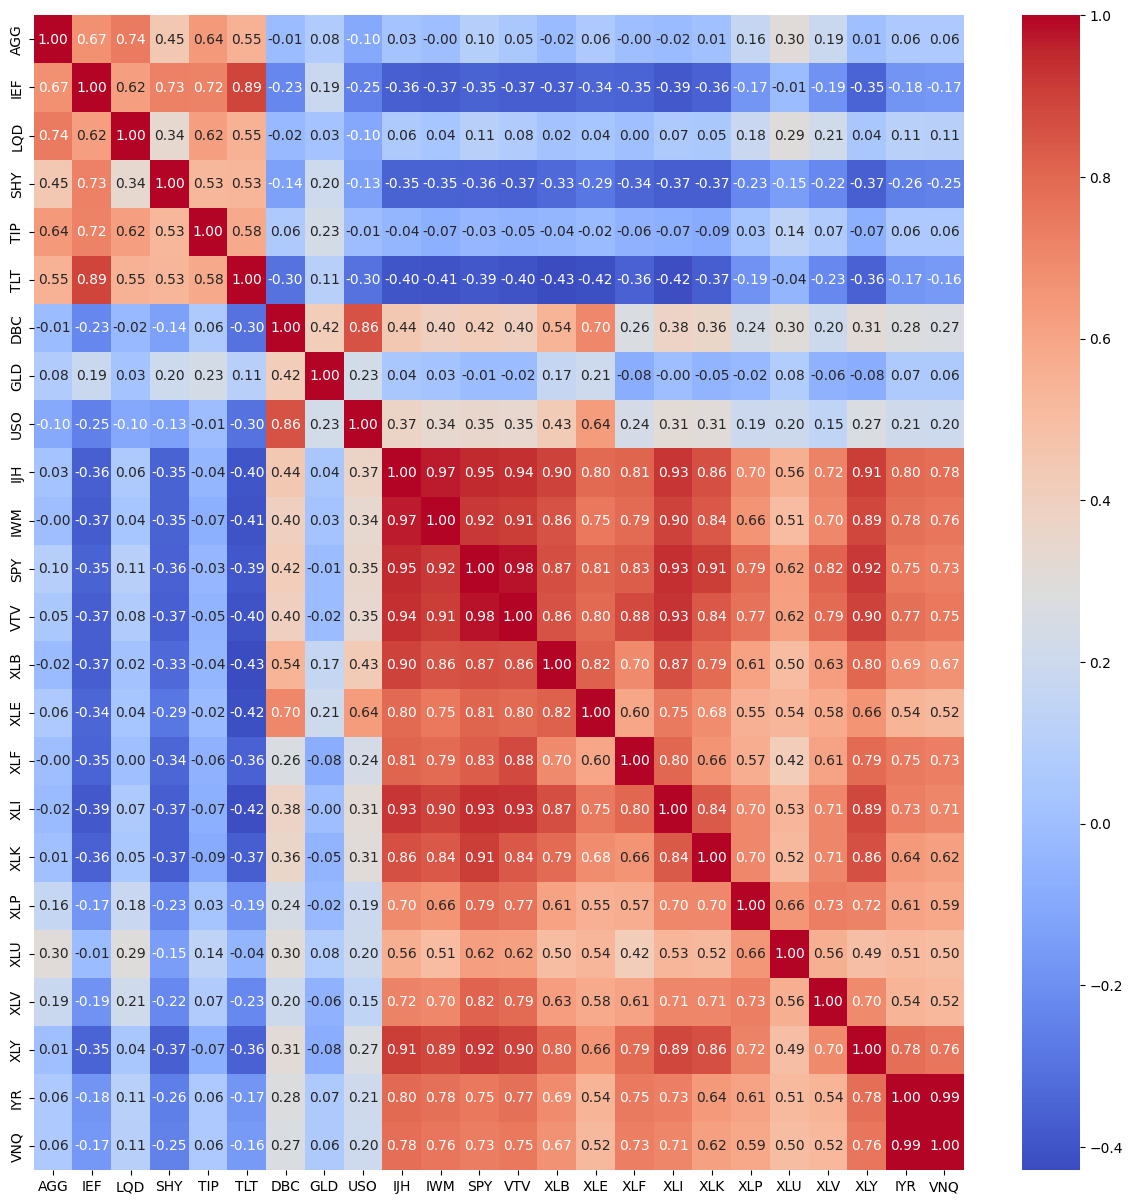

In [76]:
# vizualizirajte matricu korelacije povrata

corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### 1. Analiza glavnih komponenti

#### (a) 
Izračunajte glavne komponente matrice korelacije i izračunajte koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

In [125]:
# <Vaš kôd ovdje>

pca = PCA(n_components=len(corr_matrix))
pca.fit(corr_matrix)

components = pca.components_
explained_var_ratio = pca.explained_variance_ratio_
n_components = pca.n_components_

print('\nExplained variance ratio:', explained_var_ratio)
print('\nTotal explained:', sum(explained_var_ratio).round(2))
print('\nn components:', n_components)


Explained variance ratio: [8.90139697e-01 6.75397378e-02 1.51649948e-02 7.85729439e-03
 6.06004402e-03 4.53264846e-03 2.29609206e-03 1.54880716e-03
 1.38303954e-03 9.64181284e-04 7.39199107e-04 6.09661805e-04
 4.47820214e-04 1.78980519e-04 1.51479258e-04 1.22567261e-04
 1.07780545e-04 6.78354060e-05 6.30250792e-05 1.90627707e-05
 4.87318868e-06 9.28321141e-07 2.49731291e-07 3.89675463e-33]

Total explained: 1.0

n components: 24


#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

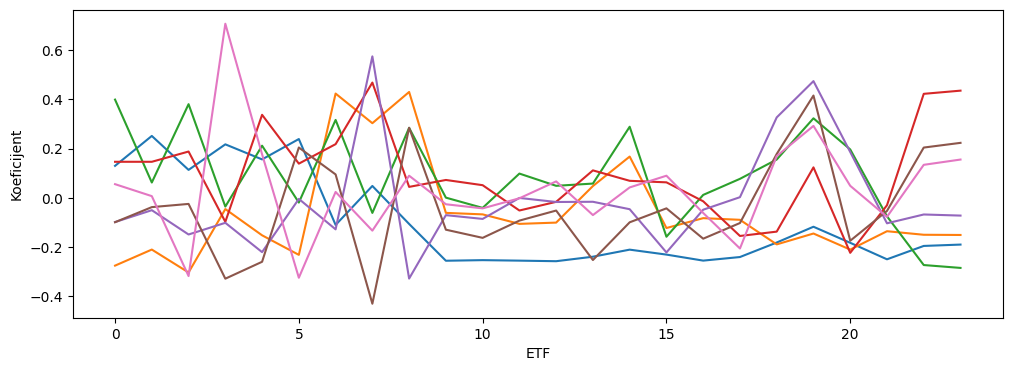

In [122]:
# <Vaš kôd ovdje>

n = 7
comps = components[:n]

plt.figure(figsize=(12, 4))
plt.plot(comps.T)
plt.xlabel('ETF')
plt.ylabel('Koeficijent')
plt.show()

#### (c) 
Prikažite graf raspršenja prve dvije glavne komponente i proučite možete li primijetiti neke zanimljive grupe. 


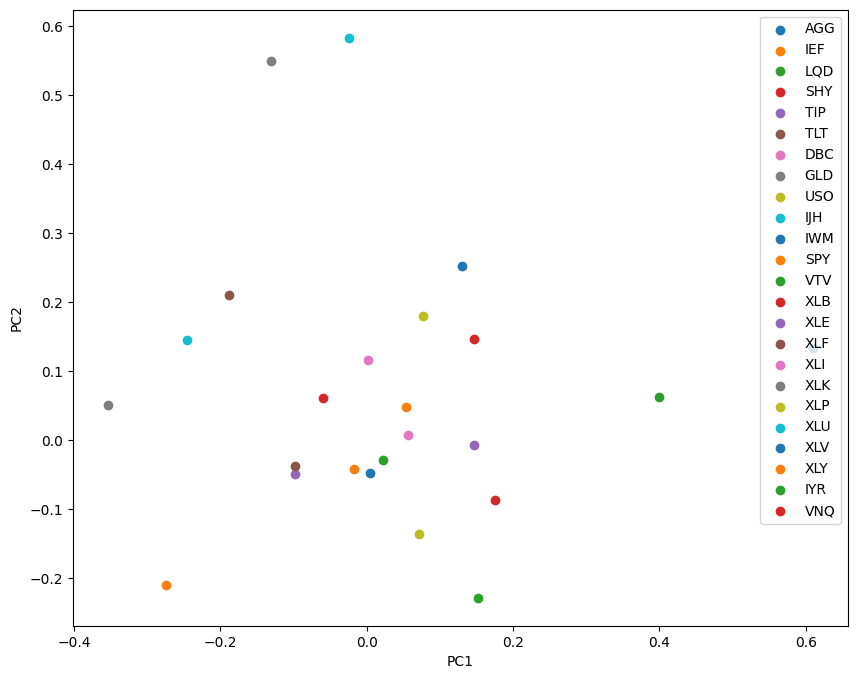

In [143]:
# <Vaš kôd ovdje>

plt.figure(figsize=(10, 8))

labels = df.columns.tolist()
for i in range(len(labels)):
    plt.scatter(components[i, 0], components[i, 1], label=labels[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:
$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.
Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.
Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:
$R_p = \sum{R_i w_i} = R\cdot w$.
Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.

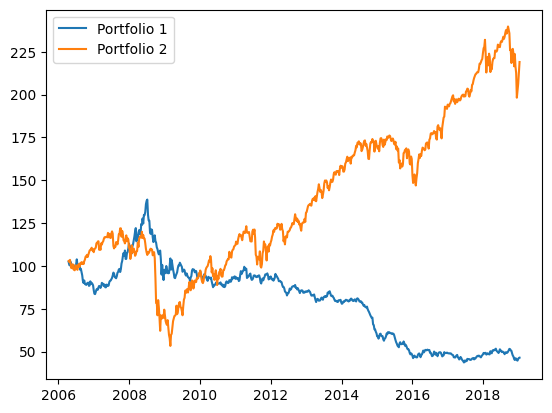



anualizirane srednje vrijednosti:
0   -0.25
1    0.38
dtype: float64


volatilnosti svojstvenih portfelja:
0    0.27
1    0.40
dtype: float64


In [159]:
# Step 1: Compute the covariance matrix
R = df
Sigma = df.cov()

# Step 2: Compute the eigenvectors and eigenvalues
eigvals, eigvecs = np.linalg.eigh(Sigma)

# Step 3: Select the first two eigenvectors
W = eigvecs[:, -2:]

# Step 4: Scale and flip the eigenvectors
W_scaled = np.multiply(W, np.sign(np.sum(W, axis=0)))
W_scaled /= np.sum(np.abs(W_scaled), axis=0)

# Calculate portfolio returns
Rp = R @ W_scaled

# Calculate prices
P = 100 * np.cumprod(1 + Rp, axis=0)

# Plot prices
plt.plot(P.iloc[:, 0], label='Portfolio 1')
plt.plot(P.iloc[:, 1], label='Portfolio 2')
plt.legend()
plt.show()

# Calculate annualized mean and volatility
mean = np.mean(Rp, axis=0) * 252
std = np.std(Rp, axis=0) * np.sqrt(252)

print(f"\n\nanualizirane srednje vrijednosti:\n{mean.round(2)}")
print(f"\n\nvolatilnosti svojstvenih portfelja:\n{std.round(2)}")

### 2. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću dvije različite metode. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja? Što možete zaključiti iz vrijednosti faktora? Pronađite procjenu vrijednosti faktora koja daje najbolju interpretabilnost.

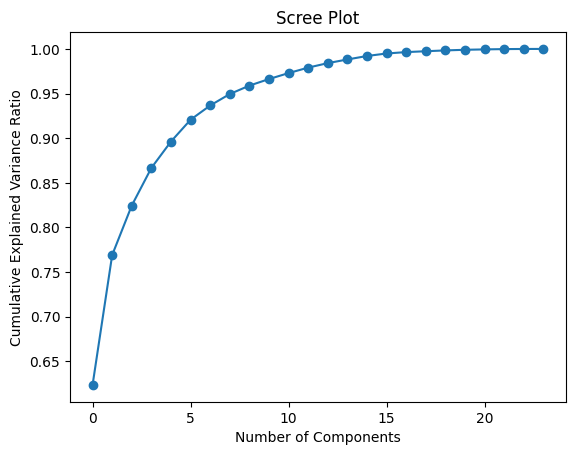

In [263]:
# <Vaš kôd ovdje>

R = df

pca = PCA(n_components=R.shape[1])
pca.fit(R)
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
ax.plot(cumulative_var, 'o-')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Scree Plot')
plt.show()

In [191]:
fa = FactorAnalyzer(n_factors=3, method='ml')
fa.fit(R)

# Get factor loadings
ml_loadings = fa.loadings_

# Get factor communalities
ml_communalities = fa.get_communalities()

# Print results
print("\nFactor Loadings (ML Method): \n", ml_loadings)
print("\n\nCommunalities (ML Method): \n", ml_communalities)


# Sum of variances for FactorAnalyzer with ML method
var = fa.get_factor_variance()
fa_ml_variances_sum = np.sum(var)

print("\n\nSum of variances for FactorAnalyzer with ML method:", fa_ml_variances_sum)


Factor Loadings (ML Method): 
 [[ 0.29557261  0.82122577 -0.15531359]
 [-0.20839417  0.92572265 -0.01377972]
 [ 0.26080898  0.76267023 -0.07574213]
 [-0.20941499  0.64376162 -0.09768477]
 [ 0.07855096  0.77740789  0.01149327]
 [-0.31176278  0.79588144  0.07186375]
 [ 0.43627056 -0.06592982 -0.04754152]
 [-0.02629852  0.17319073  0.09037269]
 [ 0.37117994 -0.12071806 -0.06676832]
 [ 0.86135051 -0.02543706  0.17218535]
 [ 0.82358459 -0.05370024  0.17884575]
 [ 0.9890863   0.03342736  0.027921  ]
 [ 0.93520282 -0.0020817   0.08905169]
 [ 0.82700612 -0.053971    0.08165154]
 [ 0.86060229 -0.01588076 -0.10087137]
 [ 0.68984685 -0.072554    0.24923733]
 [ 0.89476213 -0.04171203  0.0727656 ]
 [ 0.92854916 -0.00230809 -0.04521251]
 [ 0.79721968  0.14947639  0.0233532 ]
 [ 0.63235306  0.25217942  0.05232708]
 [ 0.90323261  0.17096646 -0.12818801]
 [ 0.824929   -0.0260381   0.17924929]
 [ 0.34919331 -0.01020335  0.7775453 ]
 [ 0.31377469 -0.01267468  0.80435799]]


Communalities (ML Method): 
 

In [193]:
fa = FactorAnalyzer(n_factors=3, method='principal')
fa.fit(R)

# Get factor loadings
principal_loadings = fa.loadings_

# Get factor communalities
principal_communalities = fa.get_communalities()

# Print results
print("\nFactor Loadings (Principal Method): \n", principal_loadings)
print("\n\nCommunalities (Principal Method): \n", principal_communalities)


# Sum of variances for FactorAnalyzer with principal axis method
var = fa.get_factor_variance()
fa_pa_variances_sum = np.sum(var)

print("\n\nSum of variances for FactorAnalyzer with principal axis method:", fa_pa_variances_sum)


Factor Loadings (Principal Method): 
 [[ 2.44923141e-01  8.64755225e-01 -1.93054655e-02]
 [-1.70278761e-01  9.06649186e-01 -2.77652954e-02]
 [ 2.98610410e-01  8.33155483e-01 -7.86084108e-02]
 [-2.97450939e-01  6.54327221e-01  1.28271142e-01]
 [ 7.96797773e-02  8.49352010e-01  1.66201816e-01]
 [-1.79724782e-01  7.97526323e-01 -1.41372568e-01]
 [ 9.40589387e-02 -6.22683590e-02  9.05514695e-01]
 [-1.93264898e-01  2.21342534e-01  6.81834648e-01]
 [ 2.81748584e-02 -1.45164583e-01  8.45990505e-01]
 [ 9.27766090e-01 -5.46825655e-02  8.82198950e-02]
 [ 9.06533735e-01 -8.28819855e-02  5.02234285e-02]
 [ 9.72158191e-01 -1.90982208e-02  3.22846495e-02]
 [ 9.61703858e-01 -4.66057520e-02  2.14239937e-02]
 [ 7.75170513e-01 -9.07472212e-02  2.65039487e-01]
 [ 6.05229898e-01 -6.39350792e-02  5.07212761e-01]
 [ 8.58820095e-01 -9.25571457e-02 -9.68211249e-02]
 [ 9.15466012e-01 -8.86495610e-02  2.26094025e-02]
 [ 8.69631507e-01 -8.37481585e-02 -4.31158987e-05]
 [ 8.50918876e-01  1.25866831e-01 -9.786655

#### (b)
Izračunajte specifične varijance faktora za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

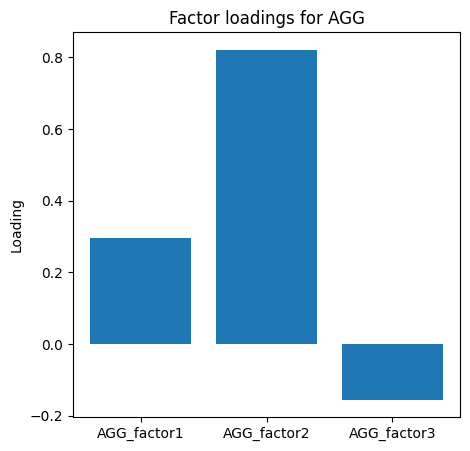

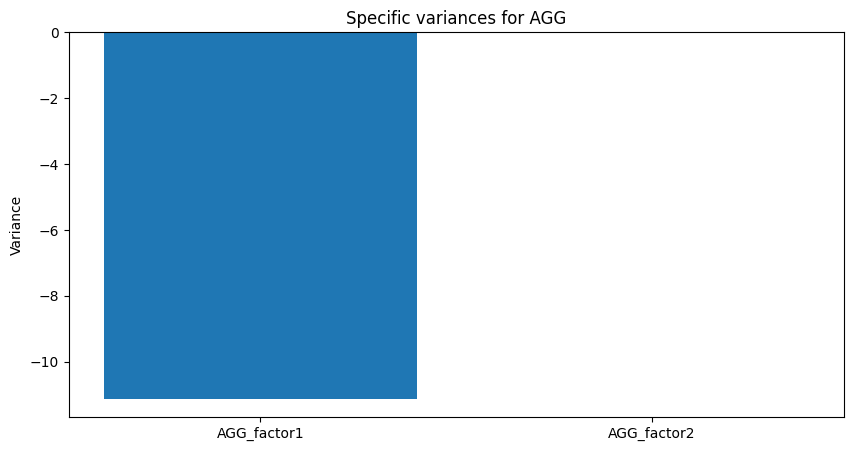

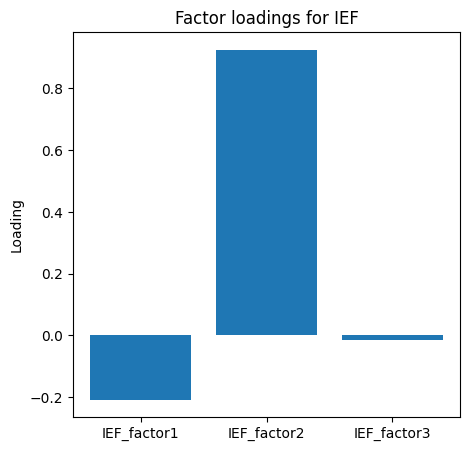

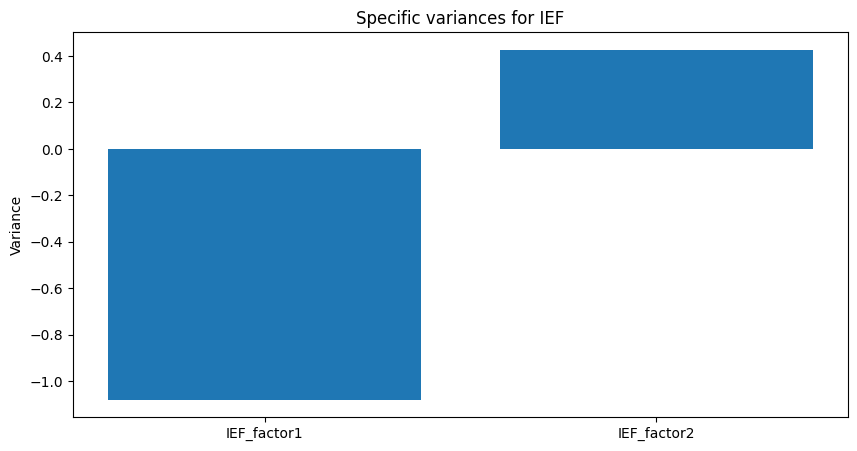

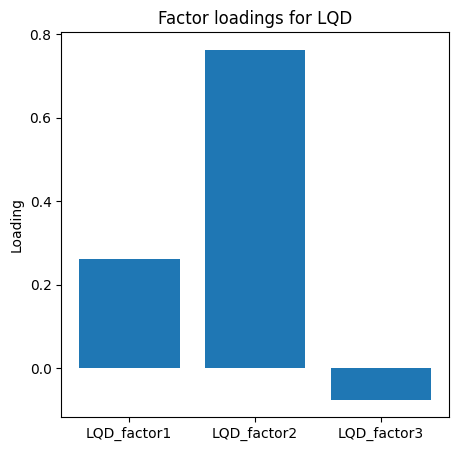

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 1000x500 with 0 Axes>

In [208]:
data = df

# Two-factor model
fa = FactorAnalyzer(n_factors=2, method='ml')
fa.fit(data)
fa_variances = fa.get_factor_variance()
fa_specific_variances = fa_variances[1] - fa_variances[0]

# Three-factor model
fa = FactorAnalyzer(n_factors=3, method='ml')
fa.fit(data)
fa_variances = fa.get_factor_variance()
fa_specific_variances_3 = [fa_variances[2][i] - fa_variances[1][i] for i in range(len(fa_variances[2]))]

# Plot bar plot for each column and factor
for i, col in enumerate(data.columns):
    plt.figure(figsize=(5,5))
    plt.bar([f"{col}_factor1", f"{col}_factor2", f"{col}_factor3"], [fa.loadings_[i][0], fa.loadings_[i][1], fa.loadings_[i][2]])
    plt.title(f"Factor loadings for {col}")
    plt.ylabel("Loading")
    plt.show()

    plt.figure(figsize=(10,5))
    plt.bar([f"{col}_factor1", f"{col}_factor2"], [fa_specific_variances[i], fa_specific_variances_3[i]])
    plt.title(f"Specific variances for {col}")
    plt.ylabel("Variance")
    plt.show()


# TODO

In [202]:
# <Vaš kôd ovdje>

# Load data
data = df

cv

# Plotting bar graph
specific_variances = [fa_specific_variances, fa_specific_variances_3]
print(specific_variances)


# Define x-axis labels
labels = ['Factor 1', 'Factor 2', 'Factor 3']

# Extract specific variances for two- and three-factor models
two_factor_specific_variances = specific_variances[0]
three_factor_specific_variances = specific_variances[1]

# Create bar plot
fig, ax = plt.subplots()
ax.bar(labels, two_factor_specific_variances, label='Two-factor model')
ax.bar(labels, three_factor_specific_variances, bottom=two_factor_specific_variances, label='Three-factor model')
ax.set_xlabel('Factors')
ax.set_ylabel('Specific variances')
ax.legend()
plt.show()

"""
x_labels = ['Two-Factor Model', 'Three-Factor Model']
x_pos = np.arange(len(x_labels))

plt.bar(x_pos, specific_variances, align='center')
plt.xticks(x_pos, x_labels)
plt.ylabel('Specific Variance')
plt.title('Comparison of Specific Variances for Two-Factor and Three-Factor Models')

plt.show()
"""

NameError: name 'cv' is not defined

### 3. Multivarijatna linearna regresija

#### (a)
Provedite 3 univarijatne linearne regresije koristeći povrate ETF-ova `AGG`, `DBC` i `SPY` kao zavisne varijable. Svaku regresiju provedite sa svim preostalim povratima ETF-ova kao nezavnim varijablama. Za svaku regresiju ispišite koeficijente te njihovu signifikantnost.

In [210]:
# <Vaš kôd ovdje>

# Select all columns except AGG, DBC, and SPY
residuals = df.loc[:, ~df.columns.isin(['AGG', 'DBC', 'SPY'])]

# Create dummy variables for each residual ETF return
dummy_vars = pd.get_dummies(residuals, drop_first=True)


# Run the linear regression for AGG
model_agg = sm.OLS(df['AGG'], sm.add_constant(dummy_vars)).fit()
print(model_agg.summary())

# Run the linear regression for DBC
model_dbc = sm.OLS(df['DBC'], sm.add_constant(dummy_vars)).fit()
print(model_dbc.summary())

# Run the linear regression for SPY
model_spy = sm.OLS(df['SPY'], sm.add_constant(dummy_vars)).fit()
print(model_spy.summary())

                            OLS Regression Results                            
Dep. Variable:                    AGG   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     73.11
Date:                Sun, 07 May 2023   Prob (F-statistic):          8.26e-155
Time:                        12:42:42   Log-Likelihood:                 2777.2
No. Observations:                 666   AIC:                            -5510.
Df Residuals:                     644   BIC:                            -5411.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.802e-05      0.000     -0.373      0.7

#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove. Ispišite signifikantnost koeficijenata multivarijatne regresije. 

In [282]:
# <Vaš kôd ovdje>

# Select dependent variables
Y = df[['AGG', 'DBC', 'SPY']]

# Select independent variables
X = df.drop(columns=['AGG', 'DBC', 'SPY'])

# Add constant to independent variables
X = sm.add_constant(X)


# Fit multivariate linear regression model
model = linearmodels.SUR.multivariate_ls(Y, X)
res = model.fit()
print(res.summary)

                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.9017
No. Equations.:                     3   McElroy's R-squared:                 0.9844
No. Observations:                 666   Judge's (OLS) R-squared:             0.9017
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9997
Time:                        14:58:13   Dhrymes's R-squared:                 0.9017
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -5.802e-05     0.0002    -0.3058     0.7598     -0.0004      0.0003
IEF         

#### (c)
Ponovite proceduru iz (b), ali zadržite samo varijable s koeficijentima na 0.05 razini signifikantnosti. Usporedite ovaj model s modelom iz (b).  Je li izbacivanje varijabli dovelo do pogoršanja modela?


In [283]:
# <Vaš kôd ovdje>

# TODO

### 4. Kanonička korelacijska analiza

Za potrebe ovog zadatka standardizirajte podatke i podijelite skup ETF-ova na dva skupa tako da: 
- prvi skup sadrži: `AGG`, `LQD`, `TIP` ,`DBC`, `USO`,`IWM`, `VTV`, `XLE`, `XLI`, `XLP`, `XLV`, `IYR`,  
- drugi skup sadrži: `IEF`, `LQD`, `SHY`, `TLT`, `GLD`, `IJH`,`SPY`, `XLB`, `XLF`, `XLK`, `XLU`,`XLY`, `VNQ`.


In [266]:
# <Vaš kôd ovdje>


# Define the two sets of ETFs
set1 = ['AGG', 'LQD', 'TIP', 'DBC', 'USO', 'IWM', 'VTV', 'XLE', 'XLI', 'XLP', 'XLV', 'IYR']
set2 = ['IEF', 'LQD', 'SHY', 'TLT', 'GLD', 'IJH', 'SPY', 'XLB', 'XLF', 'XLK', 'XLU', 'XLY', 'VNQ']

# Subset the data by selecting the columns corresponding to the two sets of ETFs
data_set1 = df[set1]
data_set2 = df[set2]

# Standardize the data
scaler = StandardScaler()
set1_scaled = scaler.fit_transform(data_set1)
set2_scaled = scaler.fit_transform(data_set2)

#### (a) 
Provedite kanoničku korelacijsku analizu s maksimalnim brojem parova kanoničkih varijabli. Koliko kanoničkih parova je statistički značajno? 

In [272]:
# <Vaš kôd ovdje>

# perform canonical correlation analysis
cca = CCA(n_components=min(len(set1), len(set2)))
cca.fit(set1_scaled, set2_scaled)

# get the scores for both sets of variables
set1_scores, set2_scores = cca.transform(set1_scaled, set2_scaled)


pairs = 0
all_corrs = []

for i in range(len(set1)):
    corr, pval = scipy.stats.pearsonr(set1_scores[:, i], set2_scores[:, i])
    if pval < 0.05:
        pairs += 1
        all_corrs.append(corr)
        
print(f"Broj statistički značajno parova:", pairs)
print(f"\n\nKorelacije:", all_corrs)

Broj statistički značajno parova: 11


Korelacije: [0.9997169087165353, 0.9975742756280179, 0.9827805012303648, 0.8300786727540131, 0.7221754028589186, 0.6613250186863432, 0.5747045631742196, 0.33969111259508783, 0.3000617056344334, 0.17518460966443475, 0.0846573124488264]


#### (b)
Pomoću *scree plota* prikažite korelacije dobivenih parova kanoničkih varijabli. 

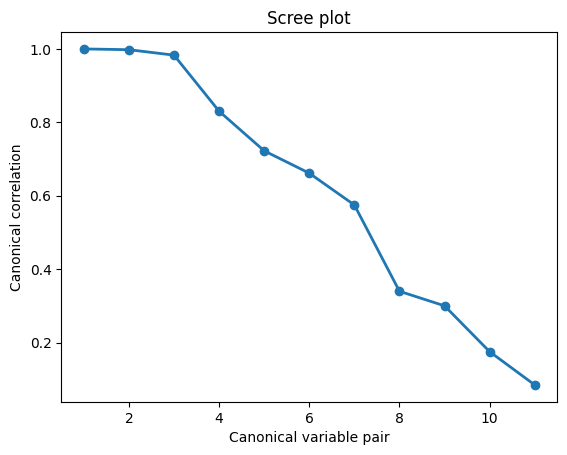

In [271]:
# <Vaš kôd ovdje>

# plot the scree plot
plt.plot(np.arange(1, len(all_corrs)+1), all_corrs, 'o-', linewidth=2)
plt.xlabel("Canonical variable pair")
plt.ylabel("Canonical correlation")
plt.title("Scree plot")
plt.show()

#### (c)
Promotrite korelacije između kanoničkih varijabli i originalnih varijabli kako bi interpretirali kanoničke varijable u terminima originalnih. Za svaki skup posebno pomoću stupčastog dijagrama prikažite korelacije originalnih varijabli i prva tri para kanoničkih varijabli (slično kao u zadatku 1.(b)). 

**Hint**: Interpretacija populacijskih kanoničkih varijabli (Predavanje 7)

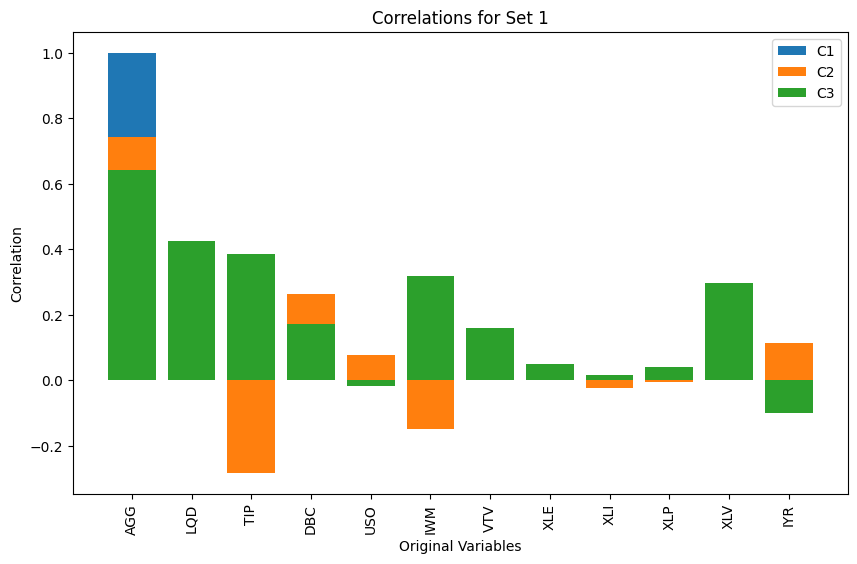

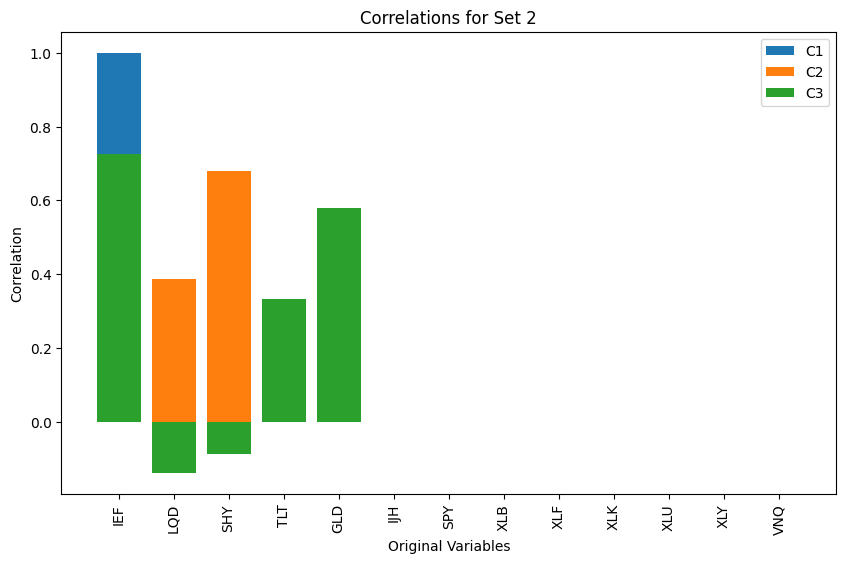

In [273]:
# <Vaš kôd ovdje>

# separate the data into two sets
set1 = ['AGG', 'LQD', 'TIP', 'DBC', 'USO', 'IWM', 'VTV', 'XLE', 'XLI', 'XLP', 'XLV', 'IYR']
set2 = ['IEF', 'LQD', 'SHY', 'TLT', 'GLD', 'IJH', 'SPY', 'XLB', 'XLF', 'XLK', 'XLU', 'XLY', 'VNQ']

# extract the data for each set
data1 = df[set1].values
data2 = df[set2].values

# standardize the data for each set
data1 = (data1 - np.mean(data1, axis=0)) / np.std(data1, axis=0)
data2 = (data2 - np.mean(data2, axis=0)) / np.std(data2, axis=0)

# fit a CCA model for each set
cca1 = CCA(n_components=min(data1.shape)).fit(data1, data1)
cca2 = CCA(n_components=min(data2.shape)).fit(data2, data2)

# extract the canonical variables for each set
can_vars1 = cca1.transform(data1)
can_vars2 = cca2.transform(data2)

# calculate the correlations between the canonical variables and the original variables for each set
corrs1 = np.corrcoef(np.hstack([data1, can_vars1]), rowvar=False)[:data1.shape[1], data1.shape[1]:]
corrs2 = np.corrcoef(np.hstack([data2, can_vars2]), rowvar=False)[:data2.shape[1], data2.shape[1]:]

# plot the correlations for set 1
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(set1)), corrs1[0], label='C1')
plt.bar(np.arange(len(set1)), corrs1[1], label='C2')
plt.bar(np.arange(len(set1)), corrs1[2], label='C3')
plt.xticks(np.arange(len(set1)), set1, rotation=90)
plt.title('Correlations for Set 1')
plt.xlabel('Original Variables')
plt.ylabel('Correlation')
plt.legend()
plt.show()

# plot the correlations for set 2
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(set2)), corrs2[0], label='C1')
plt.bar(np.arange(len(set2)), corrs2[1], label='C2')
plt.bar(np.arange(len(set2)), corrs2[2], label='C3')
plt.xticks(np.arange(len(set2)), set2, rotation=90)
plt.title('Correlations for Set 2')
plt.xlabel('Original Variables')
plt.ylabel('Correlation')
plt.legend()
plt.show()